## Perceptron Learning Algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def generateMVNRandData(Npts, mu, sigma):
    data  = np.random.multivariate_normal(mu, sigma*np.eye(len(mu)), Npts)
    return data

def plotLine(weights, range):
    x = np.array(range)
    y = -(weights[0]/weights[1])-(weights[2]/weights[1])*x
    plt.plot(y,x)

def perceptronLearningAlg(data,labels,eta,nEpochs):
    nPts = data.shape[0]
    weights = np.random.rand(data.shape[1])
    print('Initial weights:', weights)
    
    error = 1
    epo = 0
    while(error > 0 or epo < nEpochs):
        error = 0
        epo += 1
        print('Starting Epoch ',epo)
        for i in range(nPts):
            activation =  data[i,:]@weights
            if np.sign(activation) != labels[i]:
                weights += eta*data[i,:]*labels[i]
                error += 1
                plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)
                plotLine(weights, [-2,2]);
                plt.pause(2)
    
    print('Final weights:', weights)
    return weights

Initial weights: [0.64848961 0.34736238 0.89044004]
Starting Epoch  1


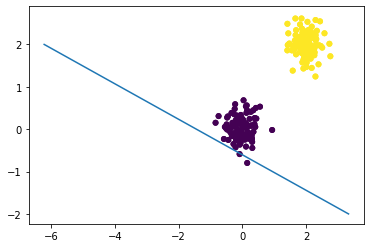

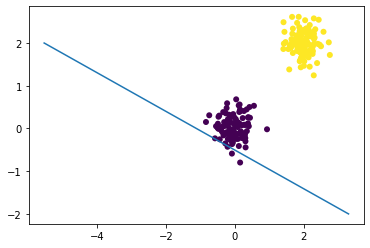

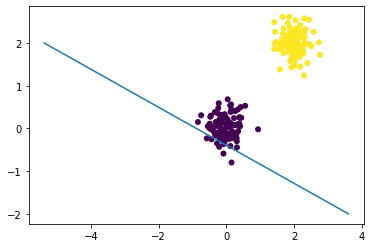

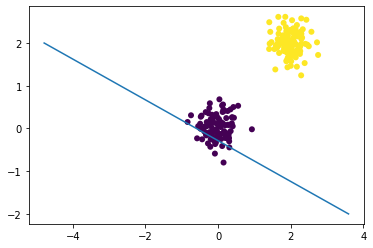

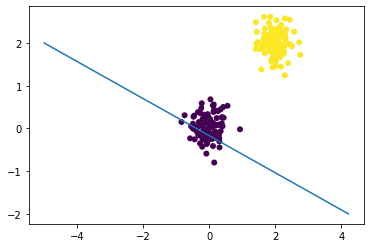

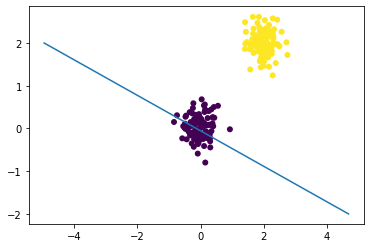

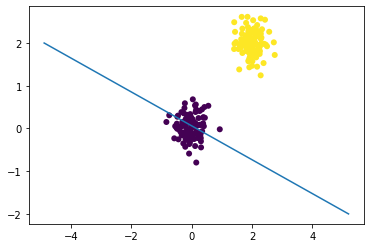

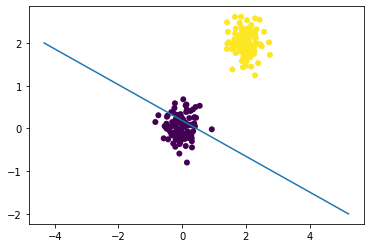

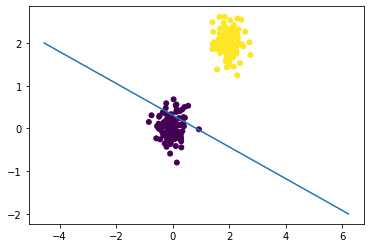

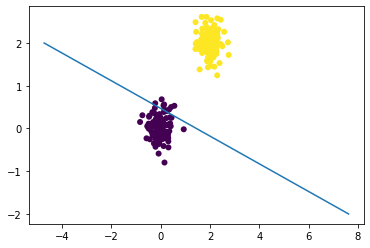

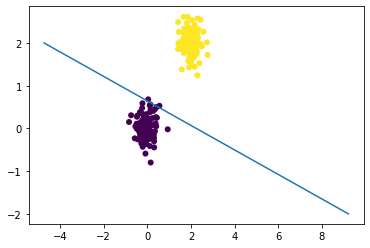

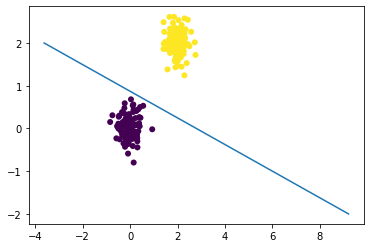

Starting Epoch  2
Starting Epoch  3
Starting Epoch  4
Starting Epoch  5
Starting Epoch  6
Starting Epoch  7
Starting Epoch  8
Starting Epoch  9
Starting Epoch  10
Final weights: [-0.55151039  0.19755035  0.63341736]


array([-0.55151039,  0.19755035,  0.63341736])

In [3]:
Npts  = 100
mu1   = [2,2]
mu2   = [0,0]
var   = .1
eta   = 0.1
nEpochs = 10;

data1 = np.array(generateMVNRandData(Npts, mu1, var))
data1 = np.hstack((np.ones((Npts,1)),data1))

data2 = np.array(generateMVNRandData(Npts, mu2, var))
data2 = np.hstack((np.ones((Npts,1)),data2))

data  = np.vstack(( data1, data2))
labels= np.hstack((np.ones(Npts), -np.ones(Npts)))

plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)

perceptronLearningAlg(data,labels,eta,nEpochs)

### Food for Thought

Questions to consider:

1. Consider a neuron with two inputs and one output and a step function. If two weights are $w_1=1$ and $w_2 =1$, and the bias is $b=-1.5$, then what is the output for inputs $(0,0)$, $(1,0)$, $(0,1)$, and $(1,1)$?

2. How does the learning behavior change with changes in $\eta$? as $\eta$ increases? as $\eta$ decreases?

3. How would you generate overlapping classes using the provided code? Explain your answer. (Only change parameters. You do not need to change code.)

4. What happens to the learning behavior when you have overlapping classes?

5. The implementation provided uses $\{-1,1\}$ labels. Suppose we want to use labels $\{0,1\}$. How can we formulate the Perceptron Learning? How does the code need to change to account for this difference (i.e., suppose you want to use $\{0,1\}$ labels. What would you need to change in the code?) Why?

6. In the provided code, there is not a separate line for learning the bias $b$ as in the pseudo-code above. How is it being estimated and represented it in the code? (... the code *is* still learning the bias value).